In [6]:
import numpy as np
from PIL import Image
import h5py

In [4]:
import os

if os.getcwd().endswith('notebooks'):
    os.chdir('..')
    print('Changed directory to', os.getcwd())

Changed directory to /morphoml


# From hdf5 to jpg

These images are log-scaled with an automatic scaling value (see Dobbels+19 Fig. 1).

In [53]:
npix = 128
filename = f'./data/images/processed_scauto_{npix}.h5'
f = h5py.File(filename, 'r')
print(f['data'].shape, f['sdss_id'].shape)

(73627, 128, 128) (73627,)


In [55]:
ngalaxies = f['sdss_id'].shape[0]
for i in range(ngalaxies):
    galname = f['sdss_id'][i]
    outfilename = f'./data/images/autoscale/{npix}pix/{galname}.png'
    arr = (127.5 * (f['data'][i] + 1)).astype(np.uint8)  # To 8-bit (0 to 255)
    im = Image.fromarray(arr, mode='L')  # L: grayscale (lum)
    im.save(outfilename)

uint8 (128, 128)


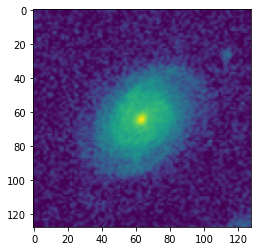

In [56]:
im = Image.open(f'./data/images/autoscale/{npix}pix/{f["sdss_id"][0]}.png')
arr = np.array(im)
print(arr.dtype, arr.shape)
plt.imshow(arr)